In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [19]:
q= open("9-6-2017-9-6-2017")
f = open("9-6-2017-9-6-2017","r+")
#print F.read(5)
l0 = f.readline()
l1 = f.readline()
l2 = f.readline()
l3 = f.readline()

for i in range(len())
l = q.readline()
print l

In [20]:
print l0,l1,l2,l3

Author,Lenovo
TimeStamp,9/6/2017  11:09
Sample Clock Rate,0.00




In [21]:
ltest = f.readline()

In [22]:
col0=[]
col1=[]
col2=[]
cont=0

while ltest[0] <> 'A':
    col0.append(cont)
    col1.append(float(ltest[:5]))
    col2.append(float(ltest[9:14]))
    ltest = f.readline()
    cont += 1
else:
    print ltest
    ll1 = f.readline()
    ll2 = f.readline()
    ll3 = f.readline()
    lltest = f.readline()
    print ll1,ll2,ll3,lltest

Author,Lenovo

TimeStamp,9/6/2017  17:09
Sample Clock Rate,0.00

0.951    0.772



In [ ]:
col1=[]
col2=[]

while ltest[0] <> 'A':
    col1.append(float(ltest[:5]))
    col2.append(float(ltest[9:14]))
    ltest = f.readline()   
else:
    #l = f.readline()
    l1 = f.readline()
    l2 = f.readline()
    l3 = f.readline()
    ltest2 = f.readline()
    print ltest,l1,l2,l3,ltest2
    ltest = ltest2

In [9]:
col1=[]
col2=[]

if ltest[0] <> 'A':
    col1.append(float(ltest[:5]))
    col2.append(float(ltest[9:14]))
    ltest = f.readline()   
elif:
    #l = f.readline()
    l1 = f.readline()
    l2 = f.readline()
    l3 = f.readline()
    ltest2 = f.readline()
    print ltest,l1,l2,l3,ltest2
    ltest = ltest2

SyntaxError: invalid syntax (<ipython-input-9-7e0a73521c40>, line 8)

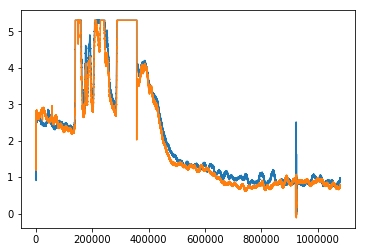

In [6]:
#plt.plot(np.array(col0))
plt.plot(np.array(col0),np.array(col1))
plt.plot(np.array(col0),np.array(col2))


In [7]:
len(col1)l0 = f.readline()

1080005